In [9]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv('/Users/sa4/Desktop/Phase-1-Portfolio-Project/csv/nyc_all_parks_filtered.csv')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18802 entries, 0 to 18801
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date            18802 non-null  object 
 1   borough         18802 non-null  object 
 2   location        18802 non-null  object 
 3   event_type      11763 non-null  object 
 4   category        18778 non-null  object 
 5   attendance      18656 non-null  float64
 6   audience        11763 non-null  object 
 7   classification  15679 non-null  object 
 8   time            18802 non-null  object 
dtypes: float64(1), object(8)
memory usage: 1.3+ MB


In [11]:
df.columns

Index(['date', 'borough', 'location', 'event_type', 'category', 'attendance',
       'audience', 'classification', 'time'],
      dtype='object')

In [12]:
df.head()

,date,borough,location,event_type,category,attendance,audience,classification,time
0,2002-06-25,Manhattan,Constance Baker Motley Recreation Center,Community Based Event,Arts/Culture,22.0,"Children, Young Adult, Adults, Teens, Seniors,...",NaN,17:00:00
1,2002-06-25,Manhattan,Pelham Fritz Recreation Center,Local Event,Arts/Culture,55.0,"Children, Young Adult, Adults, Teens, Adaptive...",NaN,16:30:00
2,2002-06-29,Manhattan,White Park,Local Event,Mobile Unit,200.0,"Children, Young Adult, Adults, Teens, Adaptive...",NaN,00:30:00
3,2002-06-30,Manhattan,Bloomingdale Playground,Local Event,Mobile Unit,125.0,"Tot, Young Adult, Children, Adults, Teens, Ada...",NaN,00:30:00
4,2002-07-02,Manhattan,Abraham Lincoln Playground,Local Event,Mobile Unit,105.0,"Young Adult, Adults, Teens, Adaptive, General ...",NaN,00:30:00


In [13]:
df.nunique()


date              1815
borough              5
location          1112
event_type           5
category            13
attendance         541
audience           721
classification      35
time               600
dtype: int64

In [14]:
df['event_type'].unique()

array(['Community Based Event', 'Local Event', 'Tournament/Competition',
       'Open House', 'Agency Produced Event', nan], dtype=object)

In [15]:
df['location'].unique()

array(['Constance Baker Motley Recreation Center',
       'Pelham Fritz Recreation Center', 'White Park', ...,
       'CUNY City College of New York',
       'Columbia University - Jerome L. Greene Science Center',
       'Frederick Douglass Academy VI High School'], dtype=object)

In [16]:
df.isna().sum()

date                 0
borough              0
location             0
event_type        7039
category            24
attendance         146
audience          7039
classification    3123
time                 0
dtype: int64

In [17]:
df = df[df.attendance.notnull()]


In [18]:
df.isna().sum()

date                 0
borough              0
location             0
event_type        6907
category            24
attendance           0
audience          6907
classification    3115
time                 0
dtype: int64

Text(0, 0.5, 'Total Attendance')

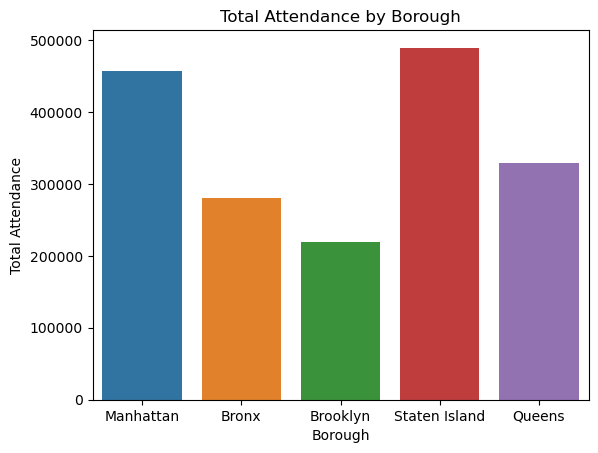

In [19]:
sns.barplot(df,x='borough',y='attendance',estimator="sum", errorbar=None, hue ='borough')
plt.title("Total Attendance by Borough")
plt.xlabel("Borough")
plt.ylabel("Total Attendance")





Staten Island seems to be the leading borough in total attendance. But this might be due to high event frequency.

Text(0, 0.5, 'Total Event Counts')

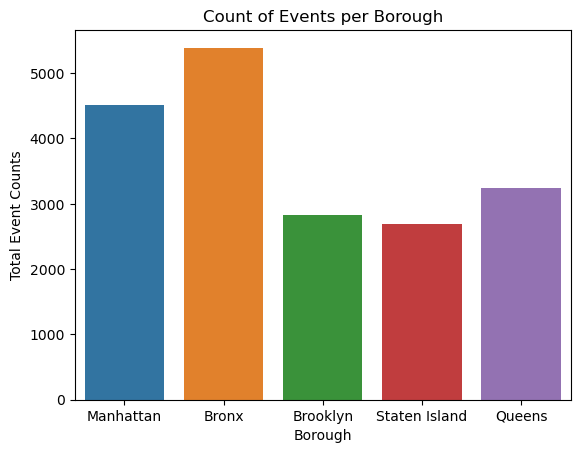

In [20]:
sns.countplot(data=df, x="borough",hue ='borough')
plt.title("Count of Events per Borough")
plt.xlabel("Borough")
plt.ylabel("Total Event Counts")


Looking at event counts per borough, we can see that Staten Island has the lowest frequency but yet the highest total attendance. Will need to dive deeper to figure out why. 

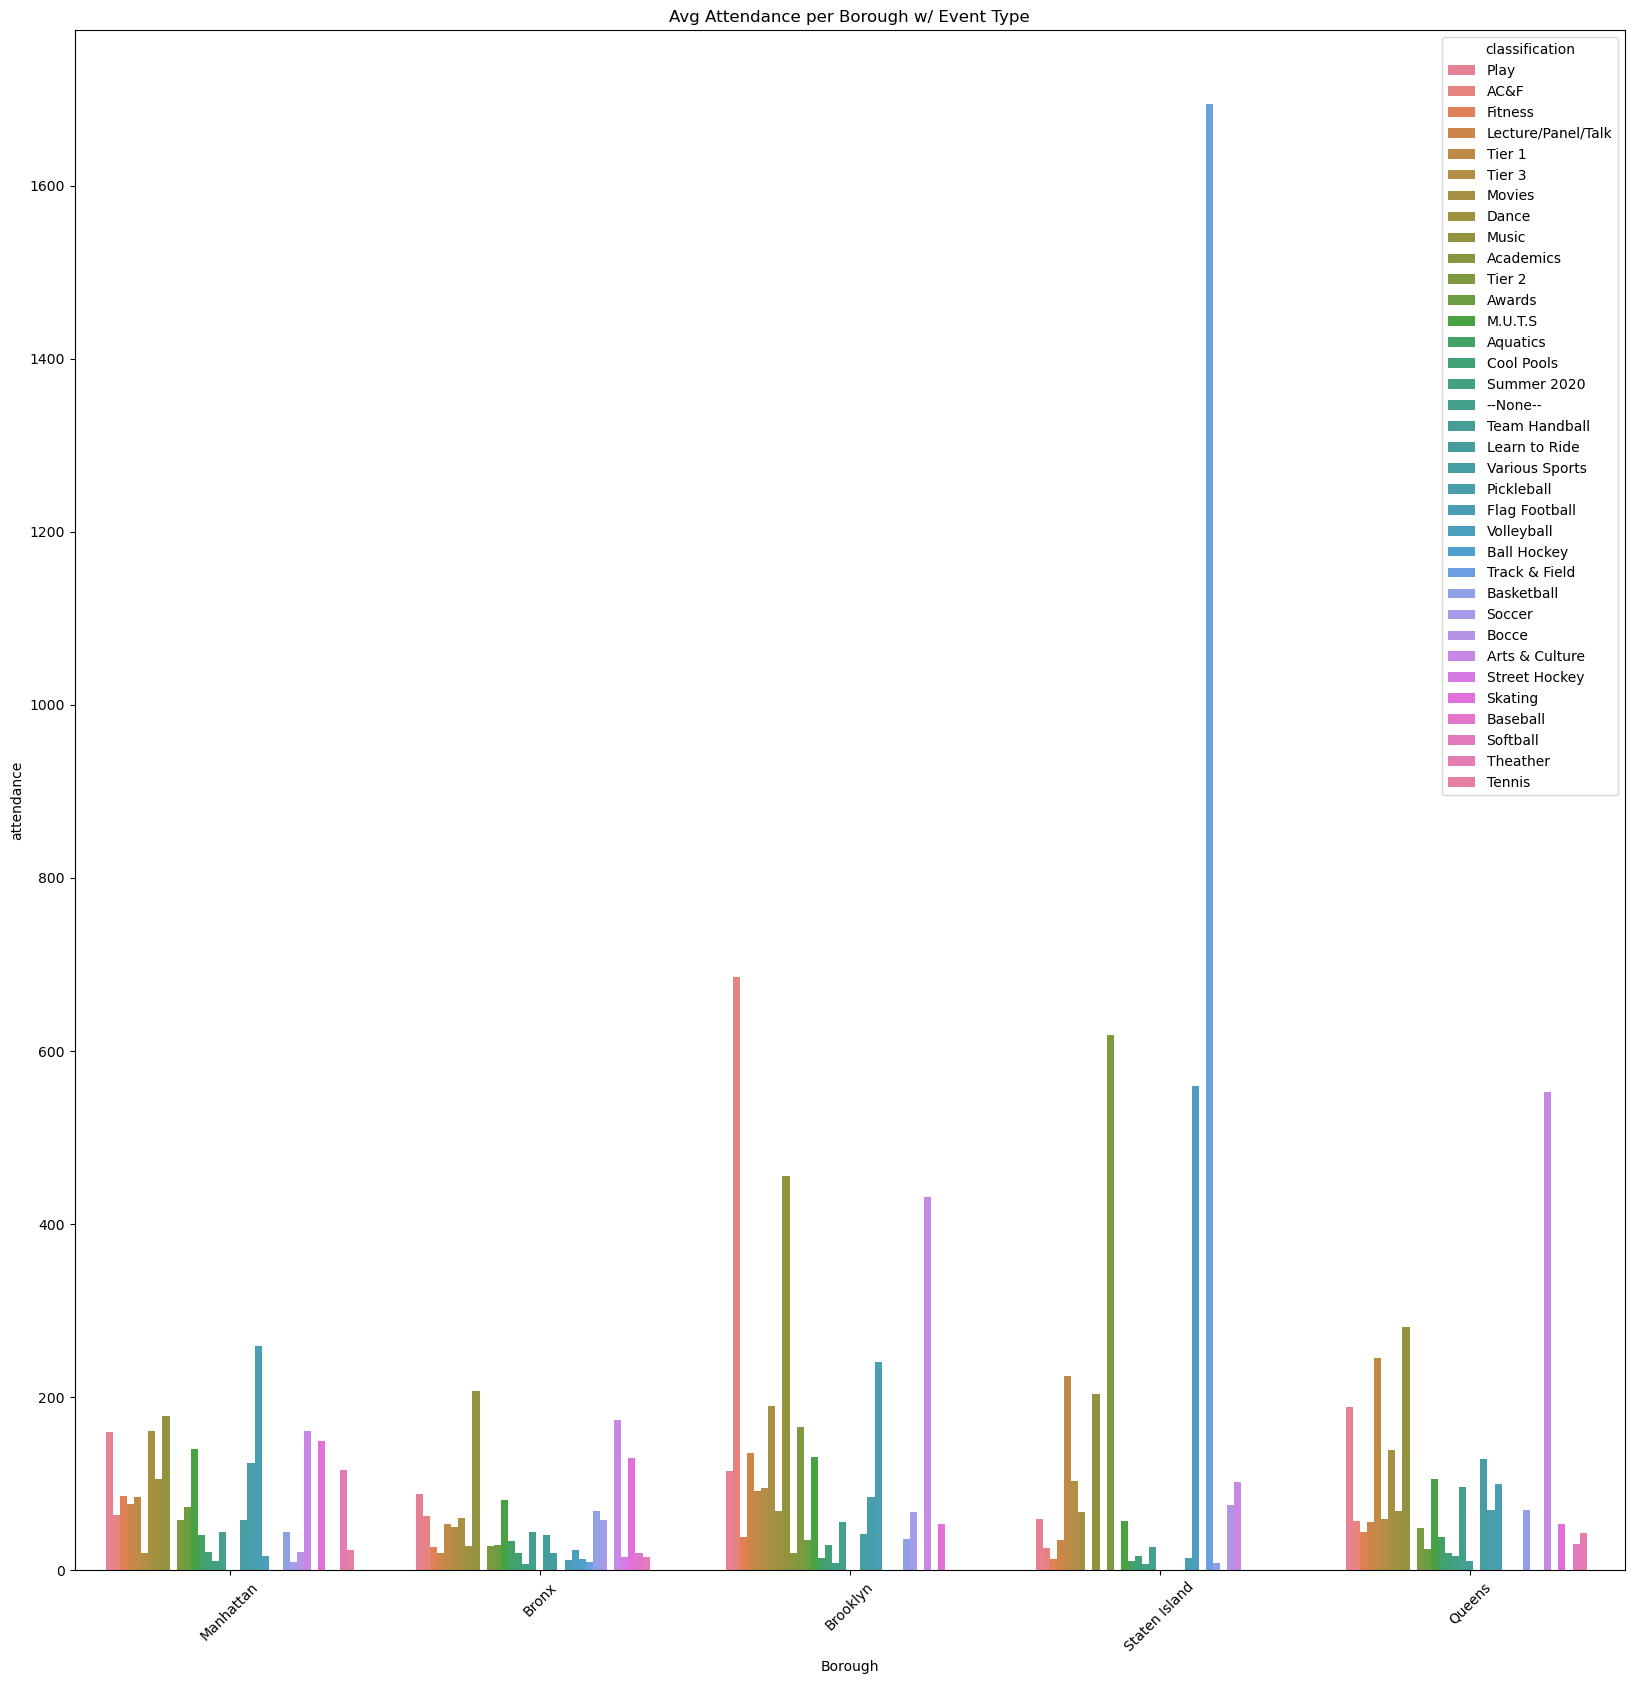

In [21]:
plt.figure(figsize=(20, 20))
sns.barplot(data=df, x='borough' , y = 'attendance', hue = 'classification', estimator= 'mean',errorbar=None)
plt.title('Avg Attendance per Borough w/ Event Type')
plt.xlabel('Borough')
plt.ylabel('attendance')
plt.xticks(rotation=45)
plt.show()

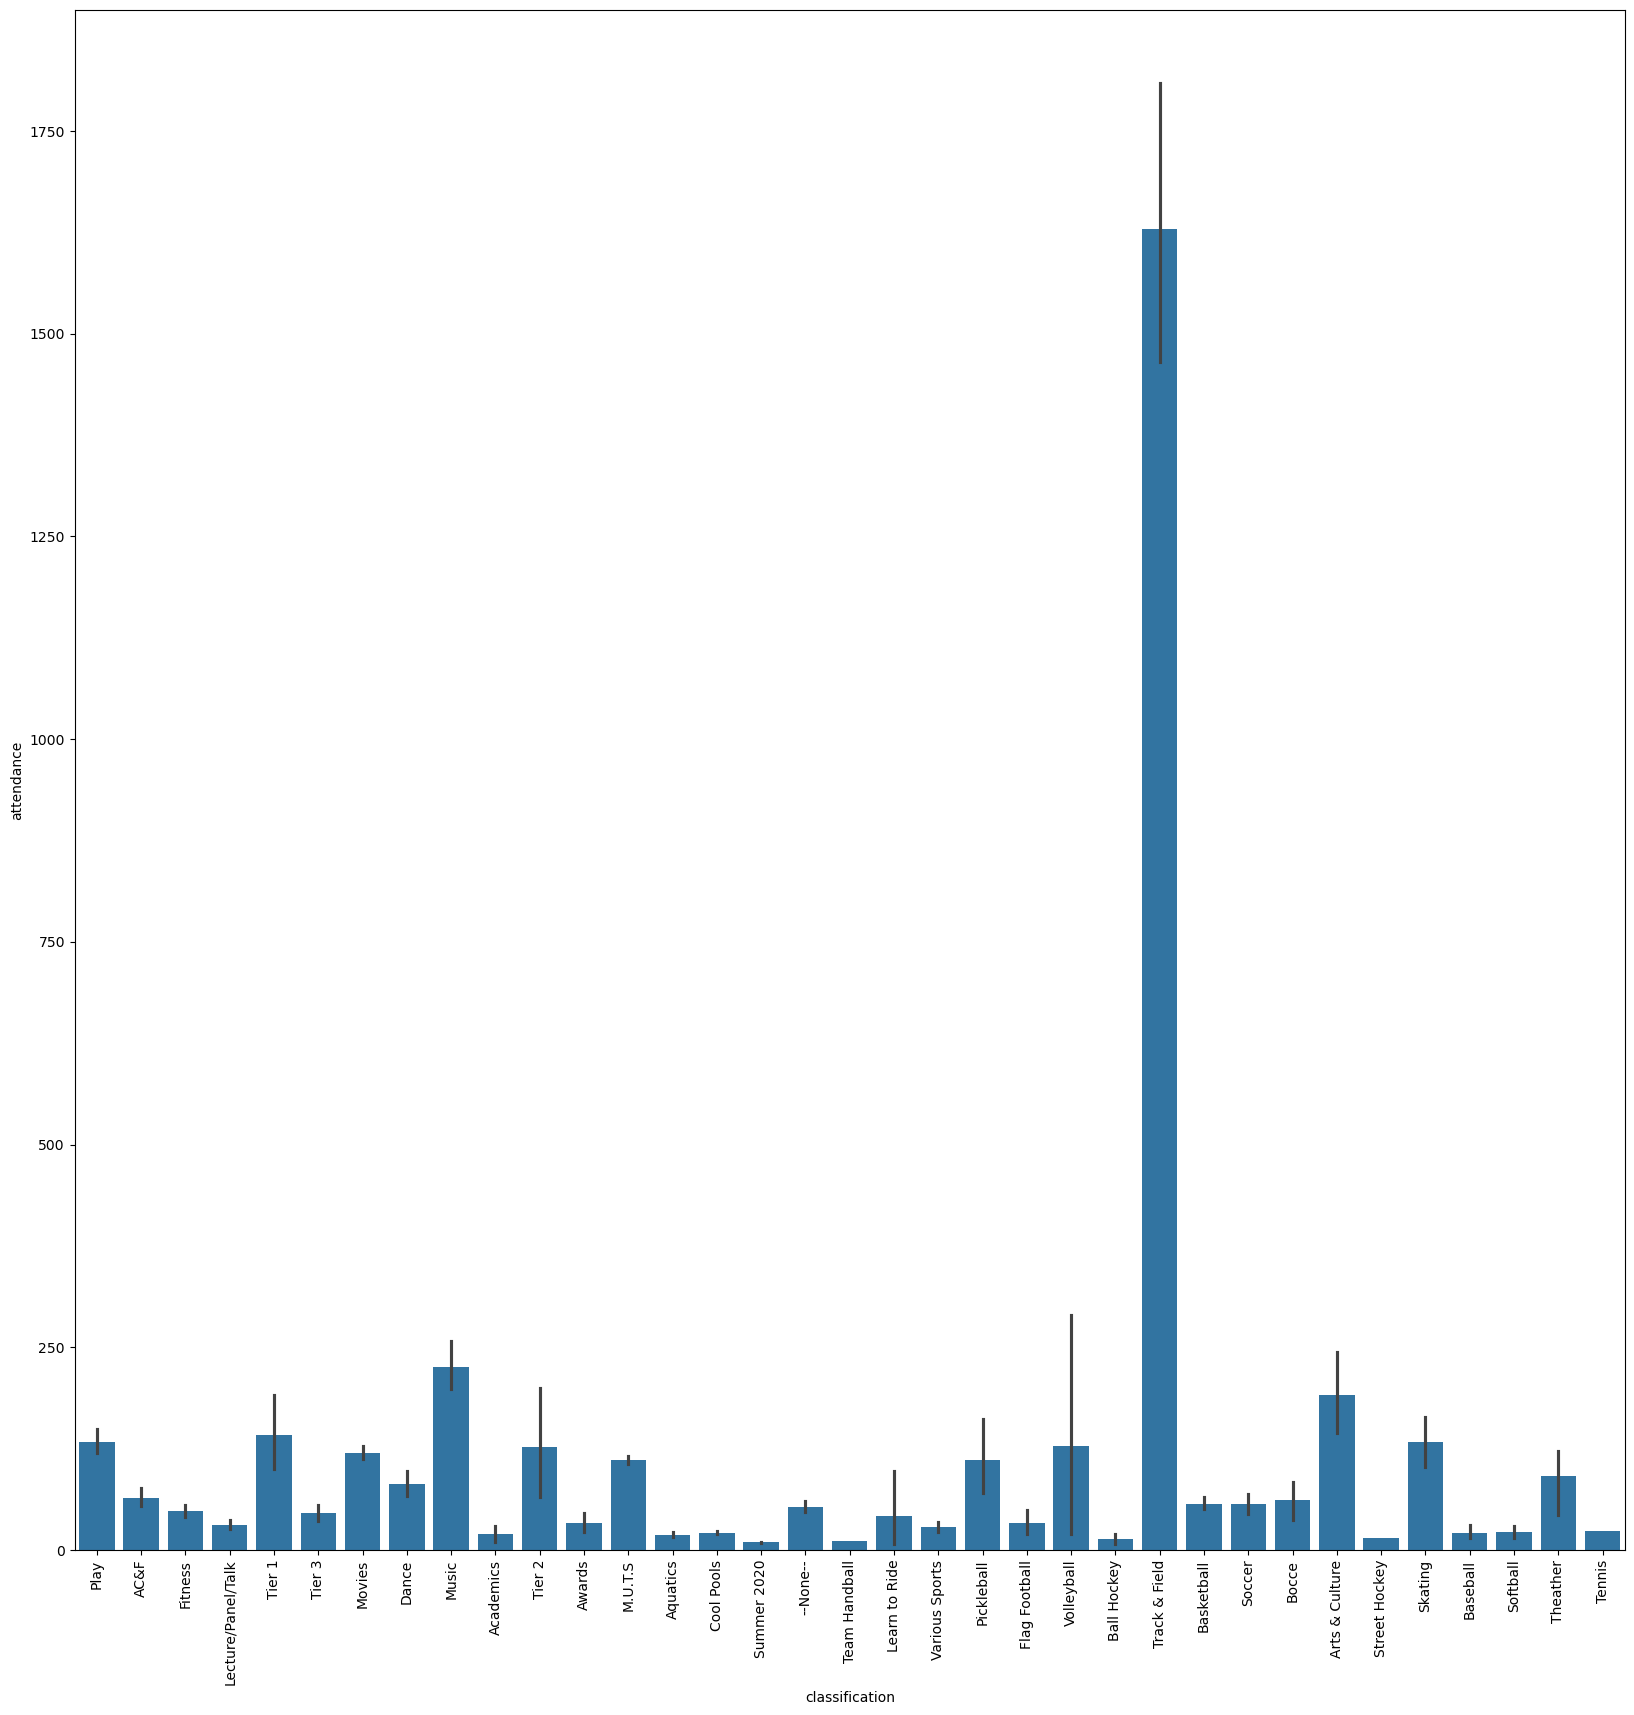

In [22]:
plt.figure(figsize=(20, 20))
sns.barplot(data=df, x='classification' , y = 'attendance', estimator= 'mean')
plt.xticks(rotation=90)
plt.show()

In [23]:
df_SI= df[df["borough"] == "Staten Island"]


In [24]:
df_SI["date"] = pd.to_datetime(df_SI["date"])  # Convert to datetime format
df_SI["year_month"] = df_SI["date"].dt.to_period("M").astype(str)  # Extract YYYY-MM


/var/folders/tz/d5q8959110ddsf_77jb4dvp00000gn/T/ipykernel_12478/3676479083.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_SI["date"] = pd.to_datetime(df_SI["date"])  # Convert to datetime format
/var/folders/tz/d5q8959110ddsf_77jb4dvp00000gn/T/ipykernel_12478/3676479083.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_SI["year_month"] = df_SI["date"].dt.to_period("M").astype(str)  # Extract YYYY-MM


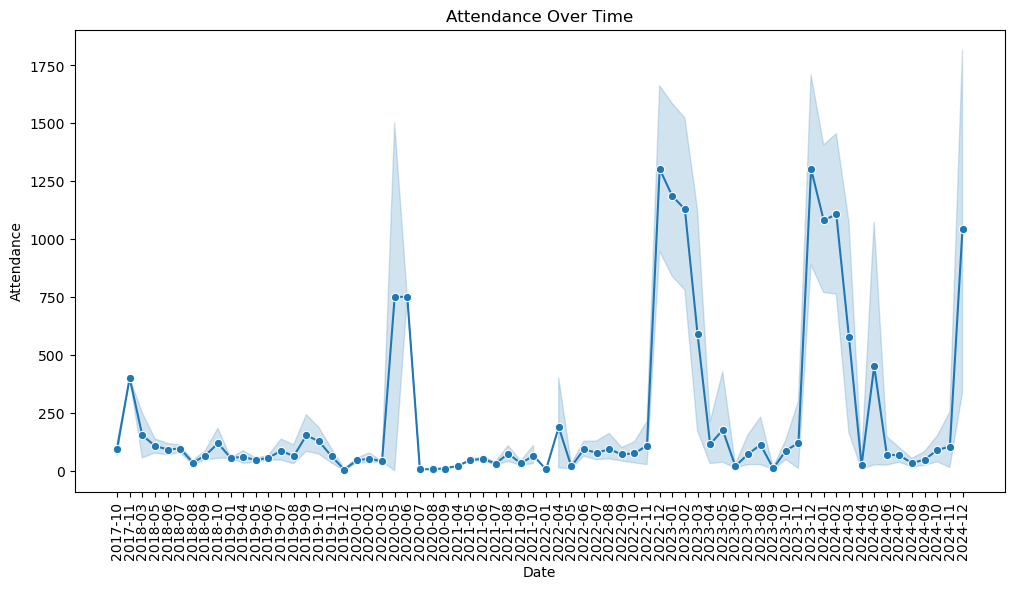

In [25]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_SI, x="year_month", y="attendance", marker="o", linestyle="-")



# Title and labels
plt.title("Attendance Over Time")
plt.xlabel("Date")
plt.ylabel("Attendance")
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability

# Show plot
plt.show()

In [26]:
df["date"] = pd.to_datetime(df["date"])  # Convert to datetime format
df["year_month"] = df["date"].dt.to_period("M").astype(str)  # Extract YYYY-MM

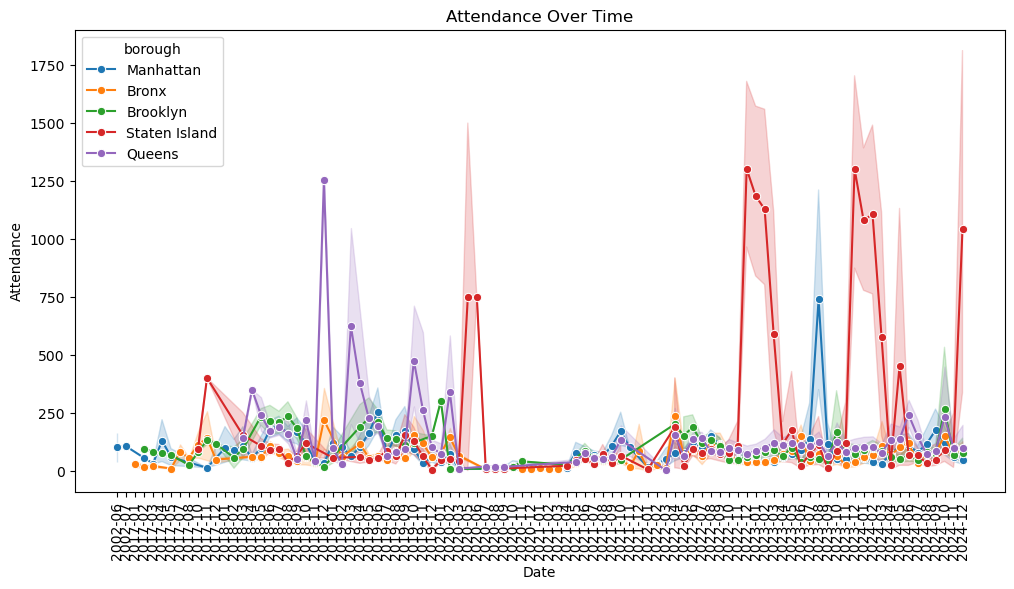

In [27]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x="year_month", y="attendance", marker="o", linestyle="-",hue='borough')

# Title and labels
plt.title("Attendance Over Time")
plt.xlabel("Date")
plt.ylabel("Attendance")
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability

# Show plot
plt.show()

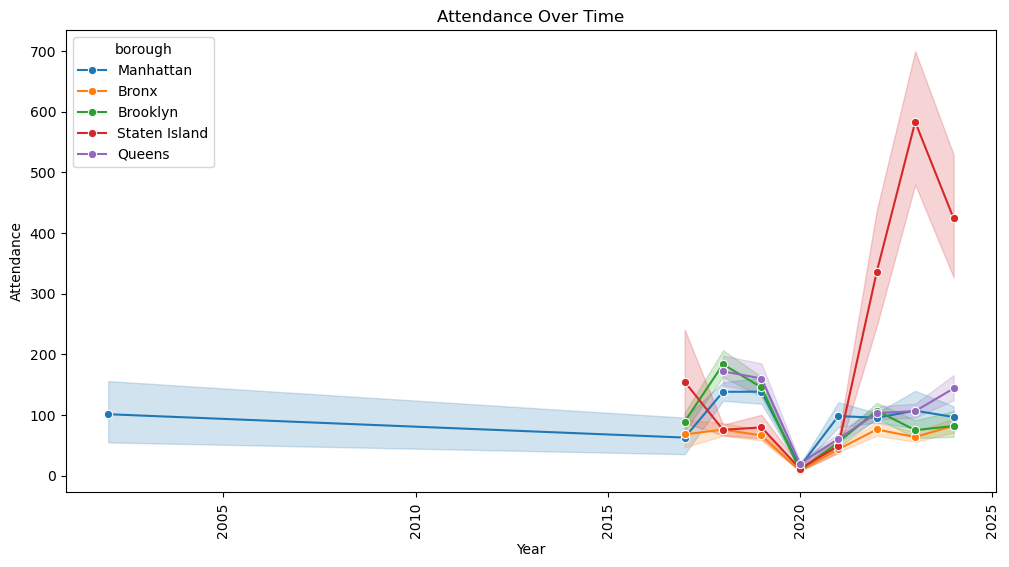

In [28]:
df["date"] = pd.to_datetime(df["date"])  # Convert to datetime format
df["year"] = df["date"].dt.year # Extract YYYY-MM

plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x="year", y="attendance", marker="o", linestyle="-",hue='borough')

# Title and labels
plt.title("Attendance Over Time")
plt.xlabel("Year")
plt.ylabel("Attendance")
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability

# Show plot
plt.show()